In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv', date_parser = True)
train_data.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500
1,2012-01-04,331.27,333.87,329.08,666.45,5749400
2,2012-01-05,329.83,330.75,326.89,657.21,6590300
3,2012-01-06,328.34,328.77,323.68,648.24,5405900
4,2012-01-09,322.04,322.29,309.46,620.76,11688800


In [3]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv', date_parser = True)
test_data.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,1657300
1,2017-01-04,788.36,791.34,783.16,786.90,1073000
2,2017-01-05,786.08,794.48,785.02,794.02,1335200
3,2017-01-06,795.26,807.90,792.20,806.15,1640200
4,2017-01-09,806.40,809.97,802.83,806.65,1272400


In [4]:
train_data = train_data.drop(['Date', 'Close'], axis = 1)
train_data.head()

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500
1,331.27,333.87,329.08,5749400
2,329.83,330.75,326.89,6590300
3,328.34,328.77,323.68,5405900
4,322.04,322.29,309.46,11688800


In [5]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)

train_data

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [116]:
X_train=[]
y_train = []
n=1

for i in range(n,len(train_data)):
    X_train.append(train_data[i-n: i])
    y_train.append(train_data[i,0])


In [117]:
X_train[0]


array([[0.08581368, 0.09640129, 0.09044931, 0.29525831]])

In [118]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [119]:
X_train.shape, y_train.shape

((1257, 1, 4), (1257,))

# LSTM MODEL

In [165]:
reg = Sequential()
reg.add(LSTM(units = 180, input_shape=(X_train.shape[0], 4)))
reg.add(Dropout(0.2))

# reg.add(LSTM(units=60, activation = 'relu', return_sequences=True))
# reg.add(Dropout(0.3))

# reg.add(LSTM(units=80, activation = 'relu', return_sequences=True))
# reg.add(Dropout(0.4))


# reg.add(LSTM(units=120, activation = 'relu', return_sequences=True))
# reg.add(Dropout(0.5))


reg.add(Dense(units = 1))






             

In [166]:
reg.summary()
X_train


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 180)               133200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 181       
Total params: 133,381
Trainable params: 133,381
Non-trainable params: 0
_________________________________________________________________


array([[[0.08581368, 0.09640129, 0.09044931, 0.29525831]],

       [[0.09701243, 0.09834351, 0.09823458, 0.22993592]],

       [[0.09433366, 0.09251685, 0.09408623, 0.26361233]],

       ...,

       [[0.95163331, 0.96485331, 0.96688892, 0.03128554]],

       [[0.95725128, 0.95807422, 0.95844067, 0.04589107]],

       [[0.93796041, 0.94257381, 0.95033338, 0.02949139]]])

In [167]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [168]:
reg.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 9.4646e-04
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 9.3418e-04
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 8.9688e-04
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 8.7440e-04
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 9.2089e-04
Epoch 11/100
79/79 [==============================] - 0s 2ms/step - loss: 7.4997e-04
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 8.1030e-04
Epoch 13/

79/79 [==============================] - 0s 2ms/step - loss: 3.6586e-04
Epoch 93/100
79/79 [==============================] - 0s 2ms/step - loss: 3.9211e-04
Epoch 94/100
79/79 [==============================] - 0s 2ms/step - loss: 4.4248e-04
Epoch 95/100
79/79 [==============================] - 0s 2ms/step - loss: 3.8660e-04
Epoch 96/100
79/79 [==============================] - 0s 2ms/step - loss: 3.7178e-04
Epoch 97/100
79/79 [==============================] - 0s 2ms/step - loss: 3.6563e-04
Epoch 98/100
79/79 [==============================] - 0s 2ms/step - loss: 4.1088e-04
Epoch 99/100
79/79 [==============================] - 0s 2ms/step - loss: 4.1613e-04
Epoch 100/100
79/79 [==============================] - 0s 2ms/step - loss: 4.0256e-04


# PREP TEST DATA TO COMPARE

In [169]:
test_data.tail()
df = test_data.append(test_data, ignore_index=True)
df.head()

,Open,High,Low,Volume
0,778.81,789.63,775.80,1657300
1,788.36,791.34,783.16,1073000
2,786.08,794.48,785.02,1335200
3,795.26,807.90,792.20,1640200
4,806.40,809.97,802.83,1272400


In [170]:
inputs = scaler.transform(df)
inputs

array([[0.92955205, 0.94948363, 0.9444234 , 0.06605527],
       [0.94731751, 0.95267709, 0.9583649 , 0.04265519],
       [0.94307612, 0.95854109, 0.96188816, 0.05315579],
       [0.96015329, 0.98360319, 0.97548871, 0.06537044],
       [0.98087655, 0.98746895, 0.99562434, 0.05064077],
       [0.98359253, 0.98590024, 0.99691241, 0.04681217],
       [0.97827219, 0.98407007, 0.99285877, 0.04237085],
       [0.98225314, 0.98265076, 0.98869147, 0.05387265],
       [0.98288563, 0.98980335, 1.00293605, 0.04370445],
       [0.98214153, 0.98218388, 0.99096454, 0.05423308],
       [0.979779  , 0.98044708, 0.99213896, 0.05152183],
       [0.97849542, 0.98655387, 0.99367328, 0.0364998 ],
       [0.98182528, 0.98175435, 0.99346492, 0.06656388],
       [0.98245777, 1.0078249 , 0.99734808, 0.07832199],
       [1.01045465, 1.01721852, 1.02401879, 0.05871446],
       [1.02407173, 1.03565092, 1.03773299, 0.05953544],
       [1.03930724, 1.03981549, 1.04142673, 0.11878254],
       [1.03354044, 1.04719219,

In [171]:
X_test = []
y_test = []
n=1

for i in range(n,inputs.shape[0]):
    X_test.append(inputs[i-n:i])
    y_test.append(inputs[i,0])

In [172]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape
y_test.shape

(39,)

In [173]:
y_pred = reg.predict(X_test)

In [174]:
y_pred

array([[0.9245619 ],
       [0.9342059 ],
       [0.9374609 ],
       [0.955486  ],
       [0.96845746],
       [0.9687594 ],
       [0.96556157],
       [0.9637893 ],
       [0.9727702 ],
       [0.96457255],
       [0.9640709 ],
       [0.96689403],
       [0.9654757 ],
       [0.97743505],
       [0.99631536],
       [1.0112298 ],
       [1.0166935 ],
       [1.013428  ],
       [0.9725959 ],
       [0.94973516],
       [0.9245619 ],
       [0.9342059 ],
       [0.9374609 ],
       [0.955486  ],
       [0.96845746],
       [0.9687594 ],
       [0.96556157],
       [0.9637893 ],
       [0.9727702 ],
       [0.96457255],
       [0.9640709 ],
       [0.9668941 ],
       [0.9654757 ],
       [0.97743505],
       [0.99631536],
       [1.0112298 ],
       [1.0166935 ],
       [1.013428  ],
       [0.9725958 ]], dtype=float32)

In [175]:
scaler.scale_

array([1.86025746e-03, 1.86751825e-03, 1.89422640e-03, 4.00480577e-08])

In [176]:
scale = 1/1.86025746e-03
scale

537.5599998937781

In [177]:
y_pred = y_pred*scale
y_test = y_test*scale

# VISUALIZE

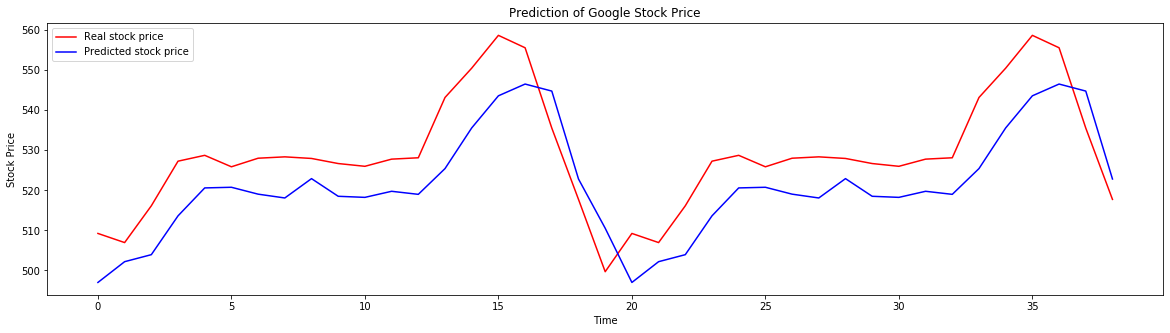

In [178]:
#Visualize Results

plt.figure(figsize=(20,5))
plt.plot(y_test, color='red', label = "Real stock price")
plt.plot(y_pred, color='blue', label = "Predicted stock price")
plt.title("Prediction of Google Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()